In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


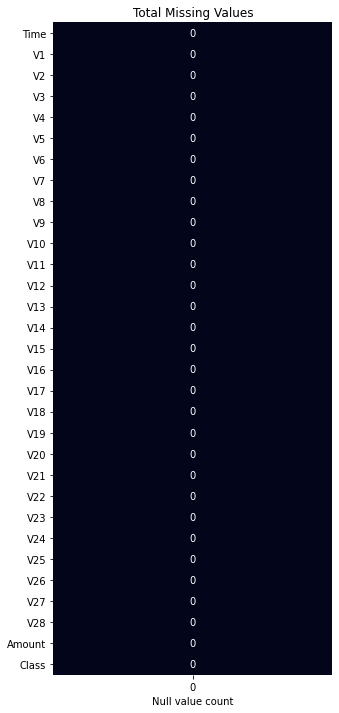

In [3]:
plt.figure(figsize=(5,12))
plt.title('Total Missing Values')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='1.0f',cbar=False)
ax.set_xlabel('Null value count')
plt.show()

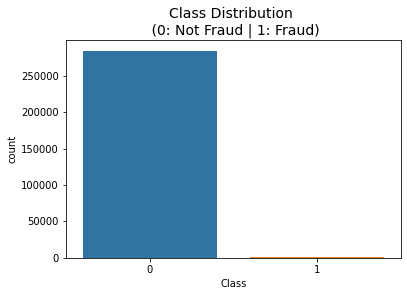

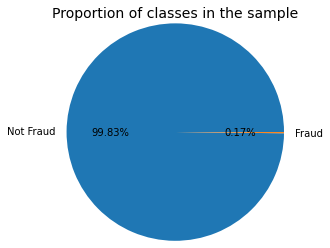

In [4]:
sns.countplot('Class', data=data)
plt.title('Class Distribution \n (0: Not Fraud | 1: Fraud)', fontsize=14)
plt.show()
label=['Not Fraud', 'Fraud']
fig = plt.pie(data['Class'].value_counts(),labels=label,autopct='%1.2f%%',radius=1.25)
plt.title('Proportion of classes in the sample',fontsize=14)
plt.show()

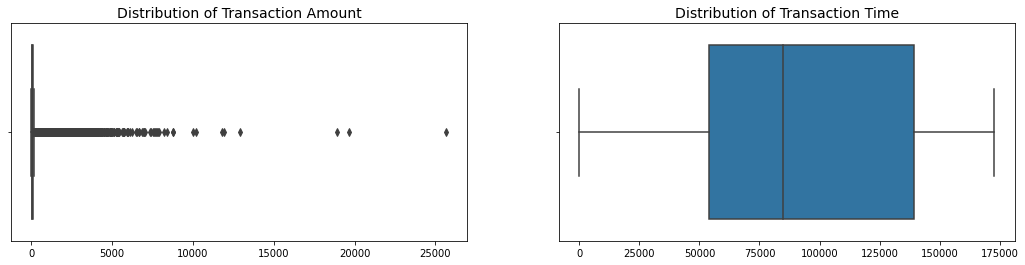

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.boxplot(data['Amount'].values, ax=ax[0])
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)

sns.boxplot(data['Time'].values, ax=ax[1])
ax[1].set_title('Distribution of Transaction Time', fontsize=14) 

plt.show()

In [6]:
# Scaling columns Amount and Time (since rest of the data has already been scaled) using RobustScaler as it works better with outliers
from sklearn.preprocessing import RobustScaler
scaled_amount = RobustScaler().fit_transform(data['Amount'].values.reshape(-1,1))
scaled_time = RobustScaler().fit_transform(data['Time'].values.reshape(-1,1))
data.drop(['Time','Amount'], axis=1, inplace=True)
data.insert(0, 'Amount', scaled_amount)
data.insert(1, 'Time', scaled_time)
data.head()

,Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=1234, stratify=data[["Class"]])

In [8]:
#Splitting the independent and the class variables into separate data frames
X_train = train.iloc[:, train.columns != "Class"]
y_train = train.iloc[:, train.columns == "Class"]
X_test = test.iloc[:, test.columns != "Class"]
y_test = test.iloc[:, test.columns == "Class"] 

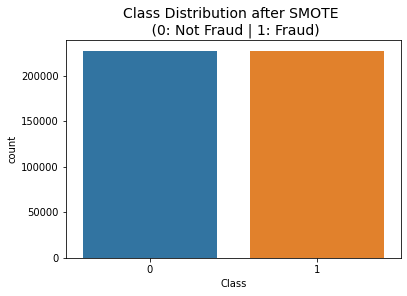

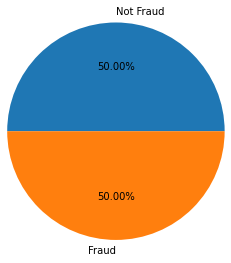

In [9]:
#Oversampling using SMOTE to rectify the imbalance in the dataset
from imblearn.over_sampling import SMOTE
X_train_smote, y_train_smote = SMOTE(random_state=1234).fit_resample(X_train, y_train)
sns.countplot('Class', data=y_train_smote)
plt.title('Class Distribution after SMOTE \n (0: Not Fraud | 1: Fraud)', fontsize=14)
plt.show()
label=['Not Fraud', 'Fraud']
fig = plt.pie(y_train_smote['Class'].value_counts(),labels=label,autopct='%1.2f%%',radius=1.25)
plt.show()

In [10]:
X_test_smote, y_test_smote = SMOTE(random_state=1234).fit_resample(X_test, y_test)
# Turning into arrays for feeding the classification algorithms
X_train = X_train_smote.values
X_test = X_test_smote.values
y_train = y_train_smote.values
y_test = y_test_smote.values

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

KNeighborsClassifier has 100.0 % accuracy on the training dataset
DecisionTreeClassifier has 100.0 % accuracy on the training dataset


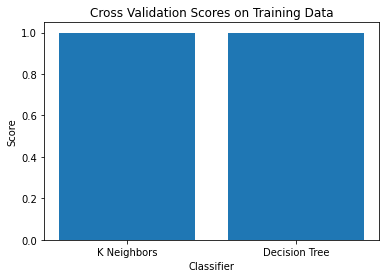

In [12]:
classifiers = {
    "K Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}
cross_val=[0,0]
i=0
for key, classifier in classifiers.items():
    cross_val[i] = cross_val_score(classifier, X_train, y_train, cv=10).mean()
    print(classifier.__class__.__name__, "has", round(cross_val[i], 2) * 100, "% accuracy on the training dataset")
    i+=1 
plt.bar(['K Neighbors','Decision Tree'],cross_val) 
plt.title('Cross Validation Scores on Training Data')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

In [13]:
y_pred=[]
cm=[]
f1=[]
acc=[]
rec=[]
prc=[]
roc=[]
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred.append(classifier.predict(X_test))
    cm.append(confusion_matrix(y_test,y_pred[len(y_pred)-1]))
    f1.append(f1_score(y_test,y_pred[len(y_pred)-1]))
    acc.append(f1_score(y_test,y_pred[len(y_pred)-1]))
    rec.append(f1_score(y_test,y_pred[len(y_pred)-1]))
    prc.append(f1_score(y_test,y_pred[len(y_pred)-1]))
    roc.append(roc_auc_score(y_test,y_pred[len(y_pred)-1]))

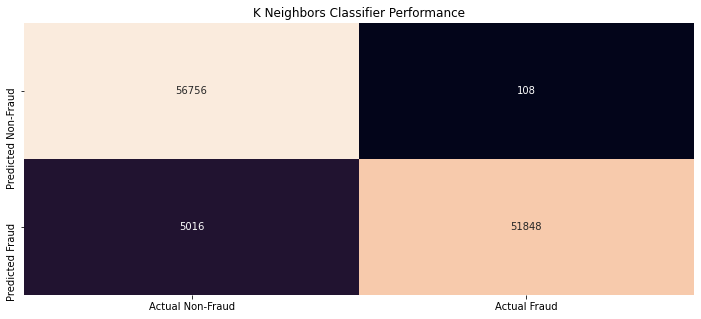

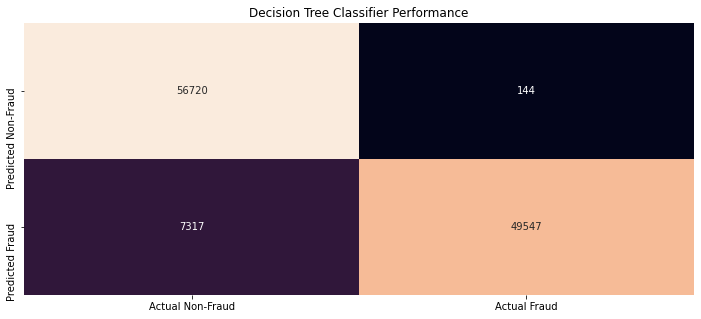

In [14]:
plt.figure(figsize=(12,5))
sns.heatmap(cm[0] ,annot=True, fmt='1.0f',xticklabels=['Actual Non-Fraud','Actual Fraud'], yticklabels=['Predicted Non-Fraud','Predicted Fraud'],cbar=False)
plt.title('K Neighbors Classifier Performance')
plt.show()

plt.figure(figsize=(12,5))
sns.heatmap(cm[1] ,annot=True, fmt='1.0f',xticklabels=['Actual Non-Fraud','Actual Fraud'], yticklabels=['Predicted Non-Fraud','Predicted Fraud'],cbar=False)
plt.title('Decision Tree Classifier Performance')
plt.show()

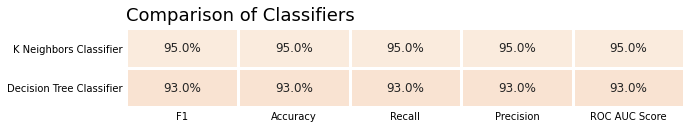

In [15]:
kn = pd.DataFrame(data=[f1[0],acc[0],rec[0],prc[0],roc[0]],columns=['K Neighbors Classifier'],index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
dt = pd.DataFrame(data=[f1[1],acc[1],rec[1],prc[1],roc[1]],columns=['Decision Tree Classifier'],index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
model_comp = round(pd.concat([kn,dt], axis=1),2)
fig = plt.figure(figsize=(10,8)) 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(model_comp.T,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
ax0.text(0,-0.2,'Comparison of Classifiers',fontsize=18)
ax0.tick_params(axis=u'both', which=u'both',length=0)
plt.show()